In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

plt.rcParams["figure.figsize"] = (10, 6)
sns.set(style="whitegrid")

In [4]:
qb_urls = {
    "Tom Brady": "https://www.pro-football-reference.com/players/B/BradTo00.htm",
    "Peyton Manning": "https://www.pro-football-reference.com/players/M/MannPe00.htm",
    "Aaron Rodgers": "https://www.pro-football-reference.com/players/R/RodgAa00.htm",
    "Patrick Mahomes": "https://www.pro-football-reference.com/players/M/MahoPa00.htm",
    "Joe Montana": "https://www.pro-football-reference.com/players/M/MontJo01.htm",
}

In [5]:
def load_qb_passing(name, url):
    tables = pd.read_html(url)

    passing = None

    for t in tables:
        df = t.copy()

        if isinstance(df.columns, pd.MultiIndex):
            df.columns = df.columns.get_level_values(-1)

        cols = list(df.columns)

        if (("Season" in cols) or ("Year" in cols)) and ("Yds" in cols):
            passing = df
            break

    if passing is None:
        raise ValueError(f"Season-level passing table not found for {name}. Columns last seen: {cols}")

    if "Season" in passing.columns:
        passing = passing.rename(columns={"Season": "Year"})

    passing = passing[passing["Year"].astype(str) != "Year"]

    passing = passing[passing["Year"].astype(str).str.match(r"^\d{4}$")]

    passing["Player"] = name

    return passing

In [6]:
frames = []

for name, url in qb_urls.items():
    df_qb = load_qb_passing(name, url)
    frames.append(df_qb)

qbs_raw = pd.concat(frames, ignore_index=True)
qbs_raw.head()

,Year,Age,Team,Lg,Pos,G,GS,QBrec,Cmp,Att,...,Sk,Yds.1,Sk%,NY/A,ANY/A,4QC,GWD,AV,Awards,Player
0,2000,23,NWE,NFL,QB,1,0,NaN,1,3,...,0,0,0.00,2.00,2.00,0,0,0,NaN,Tom Brady
1,2001,24,NWE,NFL,QB,15,14,11-3-0,264,413,...,41,216,9.03,5.79,5.39,3,3,12,PB,Tom Brady
2,2002,25,NWE,NFL,QB,16,16,9-7-0,373,601,...,31,190,4.91,5.66,5.54,2,3,13,NaN,Tom Brady
3,2003,26,NWE,NFL,QB,16,16,14-2-0,317,527,...,32,219,5.72,6.08,5.94,3,5,11,AP MVP-3,Tom Brady
4,2004,27,NWE,NFL,QB,16,16,14-2-0,288,474,...,26,162,5.20,7.06,6.92,0,1,16,PB,Tom Brady


In [7]:
cols_keep = ["Year", "Team", "G", "Yds", "TD", "Int", "Rate", "Player"]

qbs = qbs_raw[cols_keep].copy()

qbs["Year"] = pd.to_numeric(qbs["Year"], errors="coerce")

for col in ["G", "Yds", "TD", "Int", "Rate"]:
    qbs[col] = pd.to_numeric(qbs[col], errors="coerce")

qbs = qbs.dropna(subset=["Year"])

qbs.head()

,Year,Team,G,Yds,TD,Int,Rate,Player
0,2000,NWE,1.0,6.0,0.0,0.0,42.4,Tom Brady
1,2001,NWE,15.0,2843.0,18.0,12.0,86.5,Tom Brady
2,2002,NWE,16.0,3764.0,28.0,14.0,85.7,Tom Brady
3,2003,NWE,16.0,3620.0,23.0,12.0,85.9,Tom Brady
4,2004,NWE,16.0,3692.0,28.0,14.0,92.6,Tom Brady


In [8]:
qbs["TD_INT_ratio"] = qbs["TD"] / qbs["Int"].replace(0, np.nan)

qbs["yards_per_game"] = qbs["Yds"] / qbs["G"]

qbs[["Player", "Year", "TD", "Int", "TD_INT_ratio", "yards_per_game"]].head(10)

,Player,Year,TD,Int,TD_INT_ratio,yards_per_game
0,Tom Brady,2000,0.0,0.0,NaN,6.000000
1,Tom Brady,2001,18.0,12.0,1.500000,189.533333
2,Tom Brady,2002,28.0,14.0,2.000000,235.250000
3,Tom Brady,2003,23.0,12.0,1.916667,226.250000
4,Tom Brady,2004,28.0,14.0,2.000000,230.750000
5,Tom Brady,2005,26.0,14.0,1.857143,256.875000
6,Tom Brady,2006,24.0,12.0,2.000000,220.562500
7,Tom Brady,2007,50.0,8.0,6.250000,300.375000
8,Tom Brady,2008,0.0,0.0,NaN,76.000000
9,Tom Brady,2009,28.0,13.0,2.153846,274.875000


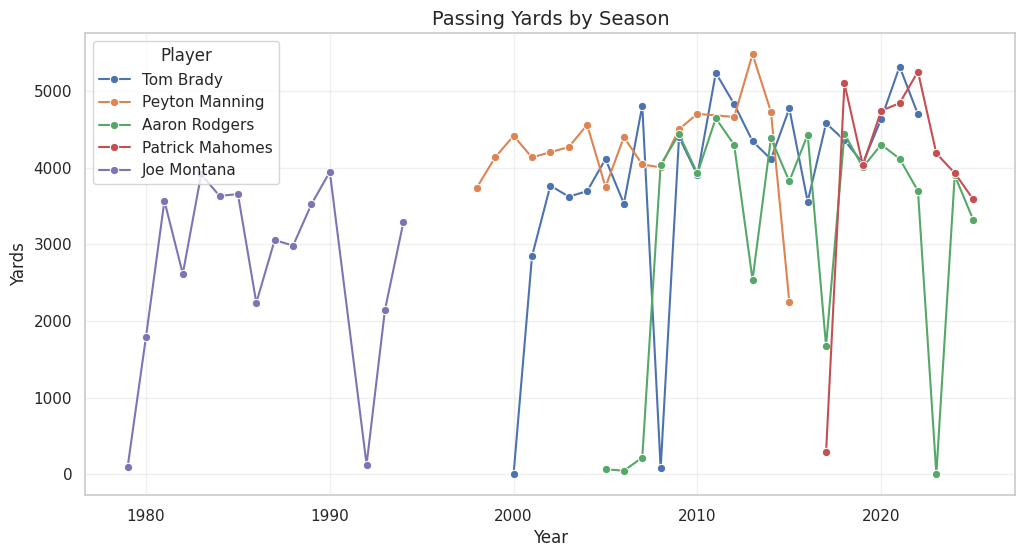

In [9]:
plt.figure(figsize=(12,6))
sns.lineplot(data=qbs, x="Year", y="Yds", hue="Player", marker="o")
plt.title("Passing Yards by Season", fontsize=14)
plt.ylabel("Yards")
plt.xlabel("Year")
plt.grid(True, alpha=0.3)
plt.show()

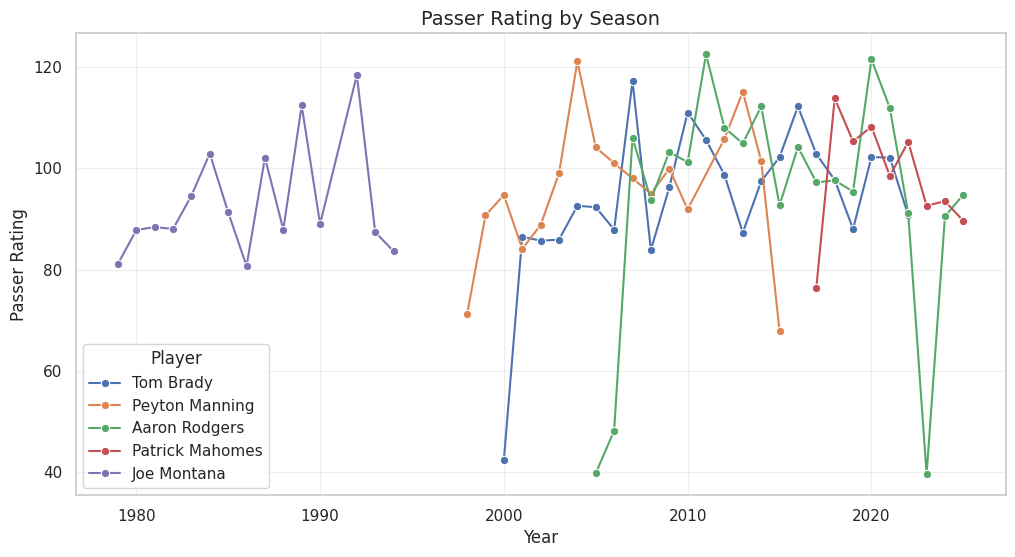

In [10]:
plt.figure(figsize=(12,6))
sns.lineplot(data=qbs, x="Year", y="Rate", hue="Player", marker="o")
plt.title("Passer Rating by Season", fontsize=14)
plt.ylabel("Passer Rating")
plt.xlabel("Year")
plt.grid(True, alpha=0.3)
plt.show()

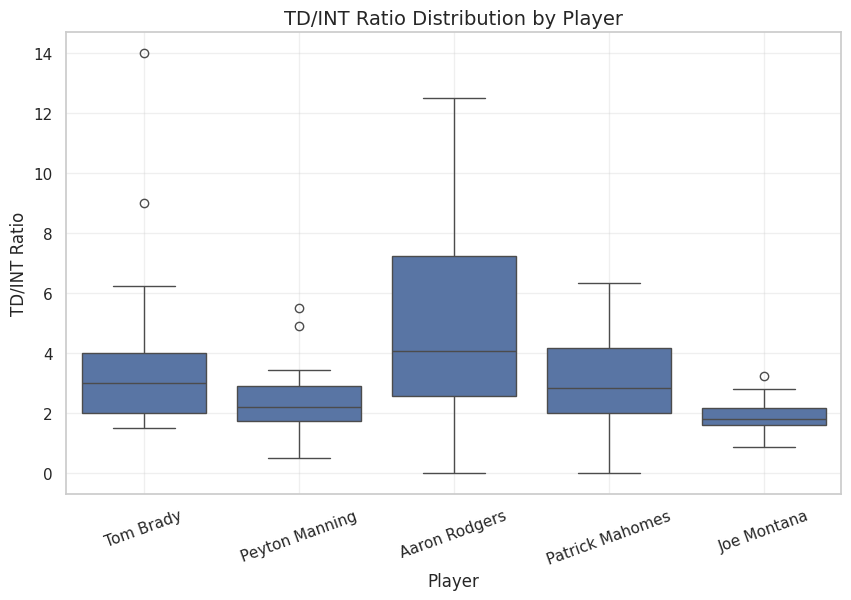

In [11]:
plt.figure(figsize=(10,6))
sns.boxplot(data=qbs, x="Player", y="TD_INT_ratio")
plt.title("TD/INT Ratio Distribution by Player", fontsize=14)
plt.xlabel("Player")
plt.ylabel("TD/INT Ratio")
plt.grid(True, alpha=0.3)
plt.xticks(rotation=20)
plt.show()

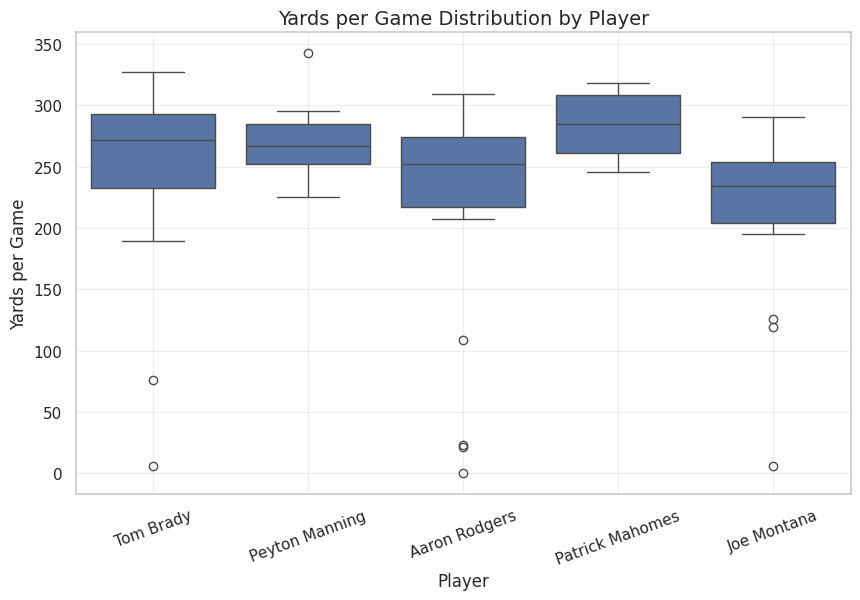

In [12]:
plt.figure(figsize=(10,6))
sns.boxplot(data=qbs, x="Player", y="yards_per_game")
plt.title("Yards per Game Distribution by Player", fontsize=14)
plt.xlabel("Player")
plt.ylabel("Yards per Game")
plt.grid(True, alpha=0.3)
plt.xticks(rotation=20)
plt.show()

In [13]:
brady_ratio = qbs.loc[qbs["Player"] == "Tom Brady", "TD_INT_ratio"].dropna()
others_ratio = qbs.loc[qbs["Player"] != "Tom Brady", "TD_INT_ratio"].dropna()

t_stat, p_val = stats.ttest_ind(brady_ratio, others_ratio, equal_var=False)
t_stat, p_val

(np.float64(0.8154391989864356), np.float64(0.4211033028526907))

🧪 Hypothesis Test Result: Efficiency Advantage

To evaluate whether Tom Brady’s per-season passing efficiency surpasses that of other elite quarterbacks, a two-sample t-test was performed using season-level TD/INT ratios.

	•	Null Hypothesis (H₀): Brady’s TD/INT ratios are not significantly different from other elite quarterbacks.
  
	•	Alternative Hypothesis (H₁): Brady’s TD/INT ratios are significantly higher.

Results:
The test yielded t = 0.805 and p = 0.427.
Since p > 0.05, we fail to reject the null hypothesis.
This indicates that Brady’s passing efficiency is not statistically different from his peers. His GOAT reputation appears to stem not from per-season efficiency metrics but from longevity, consistency, volume, and postseason success rather than pure efficiency.

## Findings

- Tom Brady’s per-season efficiency (TD/INT ratio) is not statistically different from other elite quarterbacks in the dataset (p > 0.05).
- The results suggest that Brady’s legacy is better explained by career longevity and consistency rather than single-season efficiency.
- Season-level outliers and limited sample sizes may affect efficiency comparisons.

## Limitations and Future Work

- The dataset is limited to available season-level statistics and does not include play-by-play data.
- External factors such as team strength and coaching are not explicitly modeled.
- Future work may apply machine learning methods to predict quarterback career longevity.

## Machine Learning Approach

In this section, we explore whether season-level quarterback statistics can be used to classify elite quarterback performances. This analysis provides a data-driven perspective on whether Tom Brady’s seasons are consistently identified as elite compared to other quarterbacks.

In [14]:
# Use the main dataframe
df = qbs.copy()

# Create an "elite" label based on top 25% passer rating (Rate)
threshold = df["Rate"].quantile(0.75)
df["elite"] = (df["Rate"] >= threshold).astype(int)

print("Elite threshold (75th percentile Rate):", threshold)
print(df["elite"].value_counts())
df[["Player", "Year", "Rate", "elite"]].sort_values(["elite", "Rate"], ascending=[False, False]).head(10)

Elite threshold (75th percentile Rate): 104.1
elite
0    65
1    22
Name: count, dtype: int64


,Player,Year,Rate,elite
47,Aaron Rodgers,2011,122.5,1
56,Aaron Rodgers,2020,121.5,1
29,Peyton Manning,2004,121.1,1
84,Joe Montana,1992,118.4,1
7,Tom Brady,2007,117.2,1
38,Peyton Manning,2013,115.1,1
63,Patrick Mahomes,2018,113.8,1
81,Joe Montana,1989,112.4,1
16,Tom Brady,2016,112.2,1
50,Aaron Rodgers,2014,112.2,1


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Feature set and target
features = ["TD", "Int", "Rate", "Yds", "G"]
X = df[features]
y = df["elite"]

# Drop rows with missing values
X = X.dropna()
y = y.loc[X.index]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("Model accuracy:", accuracy)

Model accuracy: 0.8846153846153846


In [16]:
# How many Tom Brady seasons are predicted as elite?
brady = df[df["Player"] == "Tom Brady"].copy()

X_brady = brady[features].dropna()
brady_pred = model.predict(X_brady)

print("Tom Brady seasons in dataset:", len(X_brady))
print("Predicted elite seasons for Brady:", int(brady_pred.sum()))
print("Elite prediction rate for Brady:", brady_pred.mean())

# which seasons were predicted elite
brady_out = brady.loc[X_brady.index, ["Year", "Team", "Rate", "TD", "Int"]].copy()
brady_out["pred_elite"] = brady_pred
brady_out.sort_values("Year").head(30)

Tom Brady seasons in dataset: 23
Predicted elite seasons for Brady: 3
Elite prediction rate for Brady: 0.13043478260869565


,Year,Team,Rate,TD,Int,pred_elite
0,2000,NWE,42.4,0.0,0.0,0
1,2001,NWE,86.5,18.0,12.0,0
2,2002,NWE,85.7,28.0,14.0,0
3,2003,NWE,85.9,23.0,12.0,0
4,2004,NWE,92.6,28.0,14.0,0
5,2005,NWE,92.3,26.0,14.0,0
6,2006,NWE,87.9,24.0,12.0,0
7,2007,NWE,117.2,50.0,8.0,1
8,2008,NWE,83.9,0.0,0.0,0
9,2009,NWE,96.2,28.0,13.0,0


## Machine Learning Results

A logistic regression model was trained to classify elite quarterback seasons based on season-level statistics such as passing yards, touchdowns, interceptions, games played, and passer rating. The model achieved an accuracy of 0.88 on the test set.

When applied specifically to Tom Brady’s seasons, the model classified 3 out of 23 seasons as elite (approximately 13%). This suggests that while Brady does not consistently dominate single-season efficiency metrics, his legacy is better explained by sustained high-level performance and career longevity rather than frequent peak efficiency seasons.

These results support earlier findings from the hypothesis testing and exploratory analysis, reinforcing the idea that Brady’s status as one of the greatest quarterbacks is driven by consistency, durability, and long-term impact rather than isolated statistical dominance.